# simple linear regression

In [1]:
import torch
from torch import nn # Define almost any deep learning library

x = torch.tensor([1.])
model = nn.Linear(1, 1) # make random init weight and bias
print(model.weight)
print(model.bias)

y = model(x) # y = xw + b
print(y)

y = x @ model.weight + model.bias
print(y)

c:\Users\yuncs\anaconda3\envs\yolov7\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Parameter containing:
tensor([[0.6880]], requires_grad=True)
Parameter containing:
tensor([-0.2882], requires_grad=True)
tensor([0.3998], grad_fn=<AddBackward0>)
tensor([0.3998], grad_fn=<AddBackward0>)


In [2]:
x = torch.tensor([1.])
model = nn.Linear(1, 1) # make random init weight and bias
print(model.weight)
print(model.bias)

y = model(x) # y = xw + b
print(y)

y = x @ model.weight + model.bias
print(y)

Parameter containing:
tensor([[0.4819]], requires_grad=True)
Parameter containing:
tensor([0.5624], requires_grad=True)
tensor([1.0443], grad_fn=<AddBackward0>)
tensor([1.0443], grad_fn=<AddBackward0>)


In [3]:
fc1 = nn.Linear(1, 5) # fully connected
fc2 = nn.Linear(5, 1)
print(fc1.weight, fc1.bias)
print(fc2.weight, fc2.bias)

x = torch.tensor([1.])
print(fc1(x))
print(fc2(fc1(x)))

print(x.shape, fc1.weight.shape)
print((x @ fc1.weight.T + fc1.bias) @ fc2.weight.T + fc2.bias)
"""
why using Transpose in nn.Linear ?
becuase In general, the values of a tensor are defined in the order (count, depth, row, column).
and nn.Linear function is taken as an input "column" by linear algebra.
"Column" generally refers to a feature of the data.
Therefore, the weight values are also sorted into "columns" to sort by feature.
"""

# using Sequential
model = nn.Sequential(nn.Linear(2, 5), nn.Linear(5, 1))
x = torch.rand(5,2) # Rows, Columns => pass 5 pieces of data (people) with two column values (age, gender)
print(model(x))

Parameter containing:
tensor([[-0.2899],
        [-0.3161],
        [-0.4880],
        [-0.1921],
        [ 0.3880]], requires_grad=True) Parameter containing:
tensor([ 0.4440,  0.9074, -0.0039,  0.8809, -0.1061], requires_grad=True)
Parameter containing:
tensor([[ 0.3374, -0.3331, -0.3877, -0.4366,  0.4348]], requires_grad=True) Parameter containing:
tensor([-0.0665], requires_grad=True)
tensor([ 0.1540,  0.5913, -0.4920,  0.6888,  0.2819], grad_fn=<AddBackward0>)
tensor([-0.1990], grad_fn=<AddBackward0>)
torch.Size([1]) torch.Size([5, 1])
tensor([-0.1990], grad_fn=<AddBackward0>)
tensor([[-0.3993],
        [-0.2898],
        [-0.0991],
        [-0.1897],
        [-0.1323]], grad_fn=<AddmmBackward0>)


In [4]:
# using class
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, simple
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
    def forward(self, x):
        x = self.linear(x)
        return x

model = MLP()
x = torch.rand(5,2)
y = model(x)
print(y)


tensor([[0.4506],
        [0.4496],
        [0.4501],
        [0.4515],
        [0.4503]], grad_fn=<SigmoidBackward0>)


torch.Size([20, 2])
torch.Size([20, 1])
MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
epoch: 0, loss: 0.73, loss: 0.73
epoch: 1, loss: 0.585, loss: 0.585
epoch: 2, loss: 0.491, loss: 0.491
epoch: 3, loss: 0.42, loss: 0.42
epoch: 4, loss: 0.364, loss: 0.364
epoch: 5, loss: 0.32, loss: 0.32
epoch: 6, loss: 0.285, loss: 0.285
epoch: 7, loss: 0.256, loss: 0.256
epoch: 8, loss: 0.233, loss: 0.233
epoch: 9, loss: 0.213, loss: 0.213
epoch: 10, loss: 0.196, loss: 0.196
epoch: 11, loss: 0.181, loss: 0.181
epoch: 12, loss: 0.169, loss: 0.169
epoch: 13, loss: 0.157, loss: 0.157
epoch: 14, loss: 0.148, loss: 0.148
epoch: 15, loss: 0.139, loss: 0.139
epoch: 16, loss: 0.131, loss: 0.131
epoch: 17, loss: 0.124, loss: 0.124
epoch: 18, loss: 0.118, loss: 0.118
epoch: 19, loss: 0.112, loss: 0.112
epoch: 20, loss: 0.107, loss: 0.107
epoch: 21, loss: 0.103, los

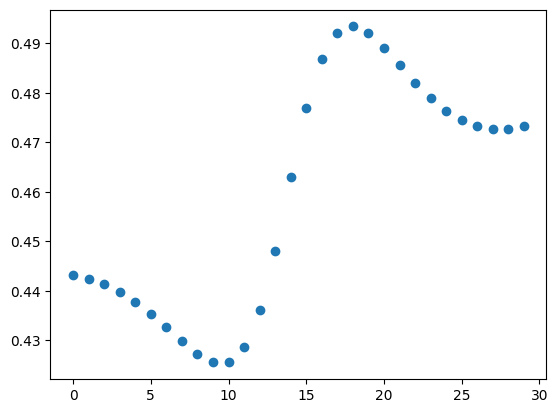

In [5]:
# binary classification
import torch

# step 01 : dataset case 1
N = 20
random_1 = torch.randn(int(N/2), 1)   # 10x1
random_2 = torch.randn(int(N/2), 1)+5
cls_1_data = torch.hstack([random_1, random_2]) # 10x2
cls_2_data = torch.hstack([random_2, random_1])
cls_1_label = torch.ones(int(N/2), 1)
cls_2_label = torch.zeros(int(N/2), 1)
x = torch.vstack([cls_1_data, cls_2_data])
y = torch.vstack([cls_1_label, cls_2_label])

print(x.shape)
print(y.shape)

"""
# dataset case 2
N = 100
radius1 = 0.3+0.05*torch.randn(int(N/2),1)
radius2 = 1+0.01*torch.randn(int(N/2),1)
theta1 = 2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2 = 2*torch.pi*torch.rand(int(N/2),1)-torch.pi
cls1_data = torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
cls2_data = torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
cls1_label = torch.ones(int(N/2),1)
cls2_label = torch.zeros(int(N/2),1)
X=torch.vstack([cls1_data, cls2_data])
y=torch.vstack([cls1_label, cls2_label])
"""
""" # show dataset
import matplotlib.pyplot as plt
#plt.plot(cls_1_data[:,0], cls_1_data[:,1], 'o')
#plt.plot(cls_2_data[:,0], cls_2_data[:,1], 'o')
plt.plot(x[:,0], x[:,1], 'o')
plt.plot(y, 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
"""

# step 02 : make model
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        """        
        # case 2, deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        # case 3, very deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]]),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        
        # case 4, very deep, relu
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.ReLU(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]]),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        """
    def forward(self, x):
        x = self.linear(x)
        return x

model = MLP()
print(model)

# step 03 : train
from torch import optim
import torch.nn.functional as func

lr = 1e-1 # learning rate
epoch = 100 
optimizer = optim.SGD(model.parameters(), lr=lr)

history_loss = list()

model.train()
for ep in range(epoch):
    y_h = model(x) # forward net
    loss = func.binary_cross_entropy(y_h, y) # loss function
    loss_static = -(torch.sum(torch.log(y_h**y*(1-y_h)**(1-y)))/N)
    optimizer.zero_grad() # Prevent gradient accumulation
    loss.backward() # backward net
    optimizer.step() # weight update
    history_loss += [loss.item()]
    print(f"epoch: {ep}, loss: {round(loss.item(),3)}, loss: {round(loss_static.item(), 3)}")

""" # Prevent gradient accumulation
x= torch.tensor([1.], requires_grad=True)
for _ in range(2):
    loss=x**2
    loss.backward()
    print(x.grad)
    # x.grad = None
"""
""" # show loss
import matplotlib.pyplot as plt
plt.plot(range(0, epoch), history_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
"""

# step 04 : test
x1_test = torch.linspace(-10,10,30).unsqueeze(1) # 30x1
x2_test = torch.linspace(-10,10,30).unsqueeze(1) # 30x1
X_test = torch.hstack([x1_test, x2_test])
print(X_test.shape) # 30x2

model.eval()
with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.squeeze()

print(Y_hat.shape)
import matplotlib.pyplot as plt
plt.plot(Y_hat, 'o')


#"""